In [1]:
!pip install sidrapy
!pip install seaborn

In [2]:
import sidrapy
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

In [10]:
#obtendo dados da taxa de inflação do SIDRA IBGE
ipca_raw = sidrapy.get_table(table_code='1737',
                              territorial_level='1',
                              ibge_territorial_code='all',
                              variable='2265',
                              period='all',
                              header='n')

In [6]:
ipca_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,,,...,1,Brasil,197912,dezembro 1979,2265,IPCA - Variação acumulada em 12 meses
1,1,Brasil,,,...,1,Brasil,198001,janeiro 1980,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,,,...,1,Brasil,198002,fevereiro 1980,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,,,...,1,Brasil,198003,março 1980,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,,,...,1,Brasil,198004,abril 1980,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...,...,...,...,...,...,...,...
528,1,Brasil,2,%,4.62,1,Brasil,202312,dezembro 2023,2265,IPCA - Variação acumulada em 12 meses
529,1,Brasil,2,%,4.51,1,Brasil,202401,janeiro 2024,2265,IPCA - Variação acumulada em 12 meses
530,1,Brasil,2,%,4.50,1,Brasil,202402,fevereiro 2024,2265,IPCA - Variação acumulada em 12 meses
531,1,Brasil,2,%,3.93,1,Brasil,202403,março 2024,2265,IPCA - Variação acumulada em 12 meses


In [11]:
#realiza a limpeza e manipulação da tabela
ipca = (
        ipca_raw
        .loc[0: ,['V','D2C']]
        .rename(columns = {'V': 'IPCA',
                          'D2C': 'Date'})
)

In [13]:
#tranforma a coluna date em tipo datetime
ipca['date'] = pd.to_datetime(ipca['Date'],
                             format='%Y%m')

In [12]:
#filtra os dados
ipca = ipca.loc[ipca.Date >= '2004-01-01']

In [14]:
#tranforma a coluna IPCA em tipo float
ipca['IPCA'] = ipca['IPCA'].astype(float)

In [20]:
ipca.describe()

,IPCA,date
count,244.000000,244
mean,5.752418,2014-02-14 20:03:56.065573888
min,1.880000,2004-01-01 00:00:00
25%,4.227500,2009-01-24 06:00:00
50%,5.585000,2014-02-15 00:00:00
75%,6.692500,2019-03-08 18:00:00
max,12.130000,2024-04-01 00:00:00
std,2.137323,NaN


C:\Users\NM282ZQ\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NM282ZQ\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='IPCA'>

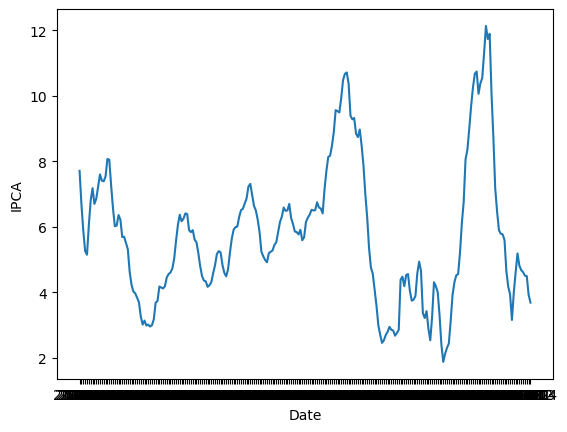

In [15]:
#constroi o grafico do IPCA
sns.lineplot(x='Date', y='IPCA', data=ipca)

In [4]:
#taxa de desocupação
desocupacao_raw = sidrapy.get_table(table_code="6381",
                                    territorial_level="1",
                                    ibge_territorial_code="all",
                                    variable="4099",
                                    period="all",
                                    header="n")

In [5]:
#realiza a limpeza e manipulação da tabela
desocupacao=(
    desocupacao_raw
    .loc[0:,['V', 'D2C']]
    .rename(columns={'V': 'desocupacao',
                    'D2C': 'date',}))

In [6]:
#tranforma a coluna date em tipo datetime
desocupacao['date']=pd.to_datetime(desocupacao['date'], format="%Y%m")

In [7]:
#filtra os dados
desocupacao=desocupacao.loc[desocupacao.date>'2004-01-01']

In [8]:
#tranforma a coluna desocupação em tipo float
desocupacao['desocupacao']=desocupacao['desocupacao'].astype(float)

In [16]:
#juntar dados
df_dados=pd.merge(ipca,desocupacao, on='date')

In [17]:
df_dados

,IPCA,Date,date,desocupacao
0,5.24,201203,2012-03-01,8.0
1,5.10,201204,2012-04-01,7.8
2,4.99,201205,2012-05-01,7.7
3,4.92,201206,2012-06-01,7.6
4,5.20,201207,2012-07-01,7.5
...,...,...,...,...
140,4.68,202311,2023-11-01,7.5
141,4.62,202312,2023-12-01,7.4
142,4.51,202401,2024-01-01,7.6
143,4.50,202402,2024-02-01,7.8


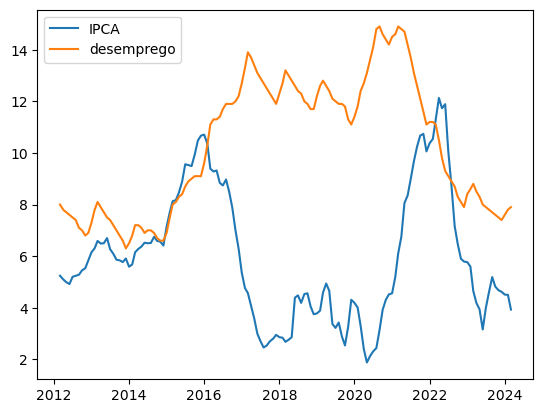

In [19]:
#construindo os graficos
plt.plot('date',
        'IPCA',
        data=df_dados,
        label='IPCA')
plt.plot('date',
        'desocupacao',
        data=df_dados,
        label='desemprego')
plt.legend()
plt.show()

In [20]:
import statsmodels.formula.api as smf

In [22]:
modelo=smf.ols('IPCA ~ desocupacao', data=df_dados).fit()

In [24]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IPCA   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.810
Date:                Fri, 17 May 2024   Prob (F-statistic):            0.00591
Time:                        09:20:23   Log-Likelihood:                -336.22
No. Observations:                 145   AIC:                             676.4
Df Residuals:                     143   BIC:                             682.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2408      0.839      9.818      0.000       6.582       9.900
desocupacao    -0.2217      0.079     -2.795      0.006      -0.379      -0.065
==============================================================================
Omnibus:                       16.180   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.399
Skew:                           0.845   Prob(JB):                     0.000101
Kurtosis:                       2.565   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='desocupacao', ylabel='IPCA'>

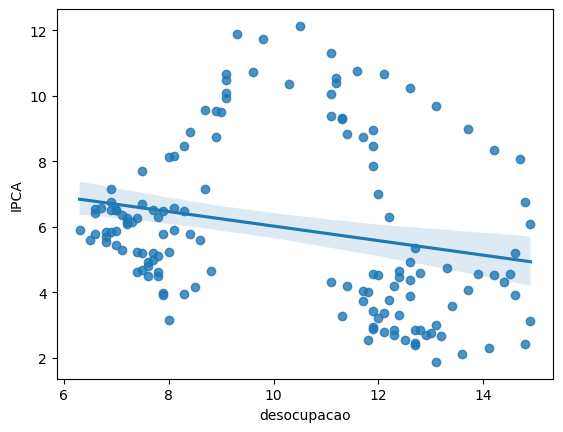

In [27]:
sns.regplot(x='desocupacao',
           y='IPCA',
           data=df_dados)